# Deep Learning for Geo/Environmental sciences

<center><img src="../logo_2.png" alt="logo" width="500"/></center>

<em>*Created with ChapGPT</em>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/climate-analytics-lab/sioc209-2024-sp/blob/main/sioc209-2024-sp/06_unsupervised_learning/11_dimensionality_reduction.ipynb)

## Lecture 12: Dimensionality Reduction

 - [Recap](#Recap)
 - [Dimensionality Reduction](#Dimensionality-Reduction)
 - [Principal Component Analysis (PCA)](#Principal-Component-Analysis-(PCA))
 - [t-Distributed Stochastic Neighbor Embedding (t-SNE)](#t-Distributed-Stochastic-Neighbor-Embedding)
 - [Autoencoders](#Autoencoders)

## Recap

In the last lecture we introduced unsupervised learning and discussed clustering algorithms. We learned about K-means clustering and hierarchical clustering.

As we discussed, unsupervised learning is a type of machine learning that looks for previously undetected patterns and structure in a dataset with no pre-existing labels.

## k-means Clustering

We learned that k-means clustering is a type of unsupervised learning algorithm that groups similar data points into clusters. 

The algorithm works iteratively to assign each data point to one of $ k $ clusters based on the features that are provided. The centroids of the clusters are then calculated based on the data points in the cluster. The algorithm iterates through two steps:

1. Assigning each data point to the nearest centroid.
2. Calculating the new centroids of the clusters.

We looked at an example of k-means clustering applied to the Old Faithful dataset and saw the importance of choosing the right number of clusters.

### Example application to Old Faithful eruptions

Let's briefly revisit the Old Faithful example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("_data/old_faithful_eruptions.csv", index_col=0)
df

,duration,delay
index,,
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
...,...,...
268,4.117,81
269,2.150,46
270,4.417,90


### Example application to Old Faithful eruptions

<Axes: xlabel='duration', ylabel='delay'>

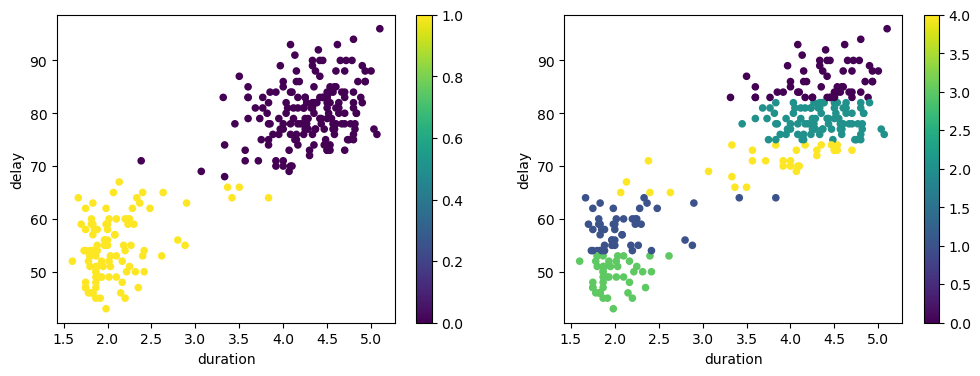

In [2]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
df.plot.scatter(x='duration', y='delay',  cmap='viridis', ax=axs[0],
                c=KMeans(n_clusters=2, random_state=42).fit_predict(df))
df.plot.scatter(x='duration', y='delay', cmap='viridis', ax=axs[1],
                c=KMeans(n_clusters=5, random_state=42).fit_predict(df))

We noted the importance of normalizing the data before applying k-means clustering because the algorithm is sensitive to the scale of the features (through the Euclidean distance):

<Axes: xlabel='duration', ylabel='delay'>

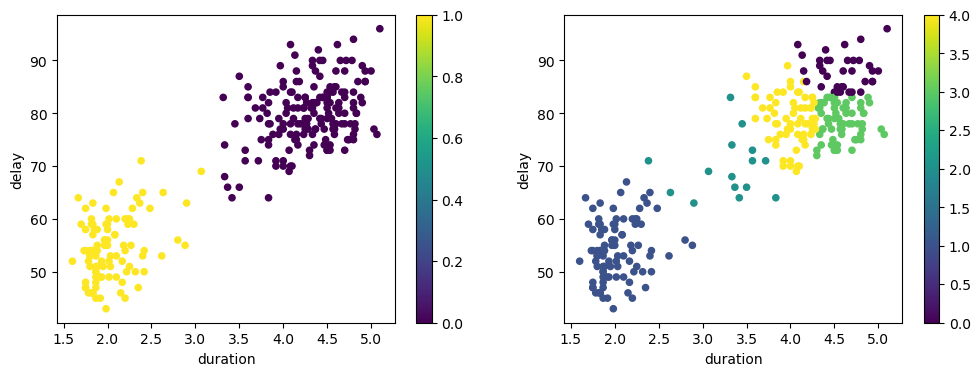

In [3]:
 # Let's normalize the data this time
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
df.plot.scatter(x='duration', y='delay',  cmap='viridis', ax=axs[0],
                c=KMeans(n_clusters=2, random_state=42).fit_predict(df / df.max()))
df.plot.scatter(x='duration', y='delay', cmap='viridis', ax=axs[1],
                c=KMeans(n_clusters=5, random_state=42).fit_predict(df / df.max()))

## Heirarchical Clustering

We also introduced hierarchical clustering, which is another clustering algorithm that groups similar data points into clusters, so does not require the number of clusters to be specified a priori.

This algorithm builds a tree of clusters, called a dendrogram, by iteratively merging the two most similar clusters. The dendrogram can be cut at different heights to obtain different numbers of clusters.

Note, that unlike k-means clustering we cannot assign new data points to clusters after the clustering is complete. This is because the clustering is based on the structure of the dendrogram and not on the cluster centers. 

##  Self-Organizing Maps (SOM)

The final clustering algorithm we discussed was the Self-Organizing Map (SOM). SOMs are a type of artificial neural network that is trained using unsupervised learning to produce a low-dimensional representation of the input space.

SOMs are useful for visualizing high-dimensional data in a 2D or 3D space. They are trained using a competitive learning algorithm, where neurons compete to be the best match for the input data.

By mapping the input space to a 2D or 3D grid, SOMs can be used to visualize high-dimensional data in a low-dimensional space, and can be considered a form of dimensionality reduction, which we will discuss in more detail in this lecture.

## Dimensionality Reduction

<center><img src="../01_intro/_images/ML_overview.png" alt="logo" width="700"/></center>

## Dimensionality Reduction

Dimensionality reduction is the process of reducing the number of features in a dataset. This can be useful for a number of reasons:

- Reducing the number of features can help to reduce the computational complexity of a model.
- Reducing the number of features can help to reduce the risk of overfitting.
- Reducing the number of features can help to visualize high-dimensional data in a lower-dimensional space.
- Reducing the number of features can help to identify the most important features in a dataset.
- Reducing the number of features can help to remove noise from a dataset.

## Dimensionality Reduction

There are two main types of dimensionality reduction techniques:

1. Feature selection: Feature selection involves selecting a subset of the original features in the dataset. This can be done using a variety of techniques, such as filter methods, wrapper methods, and embedded methods.

2. Feature extraction: Feature extraction involves transforming the original features in the dataset into a lower-dimensional space. This can be done using techniques such as PCA, t-SNE, and Autoencoders.

In this lecture, we will focus on feature extraction techniques for dimensionality reduction.

### Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a technique for reducing the dimensionality of a dataset by transforming the original features into a new set of orthogonal features called principal components.

The principal components are ordered in such a way that the first principal component captures the most variance in the data, the second principal component captures the second most variance, and so on.

PCA works by finding the eigenvectors and eigenvalues of the covariance matrix of the data. The eigenvectors are the principal components, and the eigenvalues represent the amount of variance captured by each principal component.

This is closely related to the Singular Value Decomposition (SVD) of the data matrix, which can be used to compute the principal components.

In [5]:
from sklearn.decomposition import PCA

# Generate synthetic 2D dataset
np.random.seed(0)
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]
X = np.random.multivariate_normal(mean, cov, 1000)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

[Text(0.5, 1.0, 'PCA Transformed Dataset'),
 Text(0.5, 0, 'Principal Component 1'),
 Text(0, 0.5, 'Principal Component 2')]

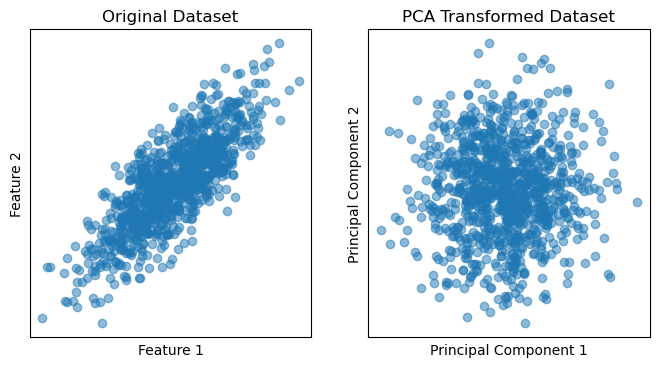

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
# Plot original dataset
ax1.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.setp(ax1, xticks=[], yticks=[], title='Original Dataset', xlabel='Feature 1', ylabel='Feature 2')

# Plot PCA-transformed dataset
ax2.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.setp(ax2, xticks=[], yticks=[], title='PCA Transformed Dataset', xlabel='Principal Component 1', ylabel='Principal Component 2')


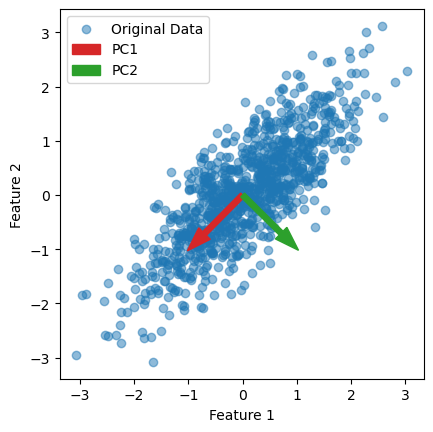

In [8]:
# Plot the original data
plt.scatter(X[:, 0], X[:, 1],  alpha=0.5, label='Original Data')

# Plot the principal component vectors
plt.arrow(0, 0, pca.components_[0, 0], pca.components_[0, 1], color='tab:red', width=0.1, label='PC1')
plt.arrow(0, 0, pca.components_[1, 0], pca.components_[1, 1], color='tab:green', width=0.1, label='PC2')
plt.setp(plt.gca(), aspect='equal', adjustable='box', xlabel='Feature 1', ylabel='Feature 2')
plt.legend()

### Summary

PCA is a powerful technique for dimensionality reduction and is widely used in a variety of applications, such as image compression, data visualization, and feature selection.



The limitations of PCA are that it is a linear technique and assumes that the data is normally distributed. If the data is non-linear or has a non-normal distribution, PCA may not be the best choice for dimensionality reduction.


## t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for reducing the dimensionality of a dataset by transforming the original features into a lower-dimensional space.



t-SNE works by modeling the high-dimensional data as a set of pairwise similarities and then finding a low-dimensional representation of the data that preserves these similarities.

Mathematically, t-SNE is composed of two main steps. First, it computes the conditional probabilities $ p_{j|i} $ that point $ j $ is a neighbor of point $ i $ in the high-dimensional space:
$$
p_{j|i} = \frac{\exp(-||x_i - x_j||^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-||x_i - x_k||^2 / 2\sigma_i^2)}
$$

Where, $p_{i|i} = 0$.



You can think of $ p_{j|i} $ as a measure of how similar point $ j $ is to point $ i $ in the original high-dimensional space, under a Gaussian distribution centered at point $ i $. The bandwidth parameter $ \sigma_i $ controls the spread of the Gaussian distribution and is typically set based on the perplexity hyperparameter.


This can be an important parameters, as this blog nicely describes: https://distill.pub/2016/misread-tsne/



Then it computes the conditional probabilities $ q_{j|i} $ that point $ j $ is a neighbor of point $ i $ in the low-dimensional space:
$$
q_{j|i} = \frac{\exp(-||y_i - y_j||^2)}{\sum_{k \neq i} \exp(-||y_i - y_k||^2)}
$$
This assumes a Student's t-distribution with one degree of freedom - allowing dissimilar points to be further apart in the low-dimensional space.



Finally, it minimizes the Kullback-Leibler divergence between the high-dimensional and low-dimensional distributions using gradient descent:
$$
C = \sum_i KL(P_i || Q_i) = \sum_i \sum_j p_{j|i} \log \frac{p_{j|i}}{q_{j|i}}
$$

The result is a low-dimensional representation of the data that preserves the local structure of the data.


## t-Distributed Stochastic Neighbor Embedding (t-SNE)



Because it calculates the pairwise similarities between data points, it scales quadratically with the number of data points, making it computationally expensive for large datasets.



t-SNE is a non-linear technique that is particularly well-suited for visualizing high-dimensional data in a lower-dimensional space. It is widely used in applications such as image processing, natural language processing, and bioinformatics.


The limitations of t-SNE are that it is computationally expensive and can be sensitive to the choice of hyperparameters. It is also not suitable for feature selection, as it does not provide a mapping from the original features to the lower-dimensional space.

Let's now look at an example of applying PCA and t-SNE to a dataset

In [9]:
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Generate a synthetic dataset
X, color = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)


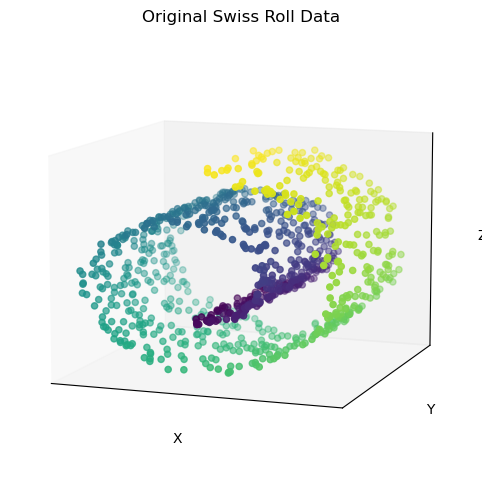

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap='viridis')
plt.setp(ax, xticks=[], yticks=[], zticks=[], xlabel='X', ylabel='Y', zlabel='Z', title='Original Swiss Roll Data')
ax.view_init(10, -70)


In [15]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=100, random_state=42)
X_tsne = tsne.fit_transform(X)


[Text(0.5, 1.0, 't-SNE'),
 Text(0.5, 0, 'Component 1'),
 Text(0, 0.5, 'Component 2')]

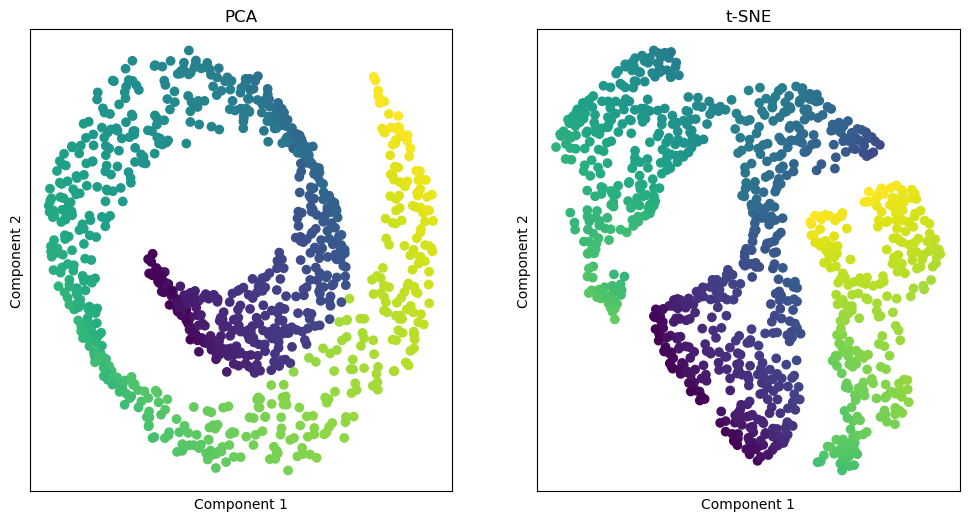

In [16]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap='viridis')
plt.setp(ax1, xticks=[], yticks=[], title='PCA', xlabel='Component 1', ylabel='Component 2')

ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap='viridis')
plt.setp(ax2, xticks=[], yticks=[], title='t-SNE', xlabel='Component 1', ylabel='Component 2')

### Summary


As you can see, PCA and t-SNE are powerful techniques for reducing the dimensionality of a dataset and visualizing high-dimensional data in a lower-dimensional space.

While PCA will preserve the global structure of the data, t-SNE will preserve the local structure of the data. 
This makes t-SNE particularly well-suited for visualizing clusters in high-dimensional data. 



Both techniques have their strengths and weaknesses, and the choice of which technique to use will depend on the specific characteristics of the data and the goals of the analysis.

## Autoencoders

Autoencoders are a type of artificial neural network that is trained using unsupervised learning to learn a low-dimensional representation of the input data.



Autoencoders consist of an encoder network that maps the input data to a lower-dimensional representation, and a decoder network that maps the lower-dimensional representation back to the original input data.



Autoencoders are trained by minimizing the reconstruction error between the input data and the output data. The encoder network learns to compress the input data into a lower-dimensional representation, while the decoder network learns to reconstruct the input data from the lower-dimensional representation.



So, instead of learning a mapping from the input data to a target output, as in supervised learning, autoencoders learn a mapping from the input data to itself.


## Autoencoders

Autoencoders are useful for a variety of applications, such as data compression, denoising, and feature extraction. They can also be used for dimensionality reduction, by training the autoencoder to learn a low-dimensional representation of the input data.



A key component of autoencoders is the bottleneck layer, which is the layer in the network that has the lowest dimensionality. The bottleneck layer forces the network to learn a compressed representation of the input data, which can be used for dimensionality reduction.



The loss function for training an autoencoder is typically the mean squared error between the input data and the output data:

$$
L = \frac{1}{N} \sum_{i=1}^{N} ||x_i - \hat{x}_i||^2
$$

where $ N $ is the number of data points, $ x_i $ is the input data, and $ \hat{x}_i $ is the output data.



Let's now look at an example of training an autoencoder on the MNIST dataset.

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape the input images
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))


In [40]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Define the autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Create a separate encoder model
# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# and a separate decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [41]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Evaluate the autoencoder on the test set
score = autoencoder.evaluate(x_test, x_test, verbose=0)
print('Test loss:', score)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1074 - val_loss: 0.0412
Epoch 2/10
 15/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0409 

2024-05-22 14:59:43.462752: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0378 - val_loss: 0.0291
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0278 - val_loss: 0.0231
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0225 - val_loss: 0.0193
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0190 - val_loss: 0.0167
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0166 - val_loss: 0.0149
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0149 - val_loss: 0.0135
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0136 - val_loss: 0.0125
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0126 - val_loss: 0.0117
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0119 - val_loss: 0.0111
Test loss: 0.011181379668414593


Now we have trained an autoencoder on the MNIST dataset and used it to learn a low-dimensional representation of the input data. The autoencoder has learned to compress the input data into a 2D representation, which can be used for dimensionality reduction.

Let's plot the 2D representation of the input data and see how well the autoencoder has learned to capture the underlying structure of the data.

In [42]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step


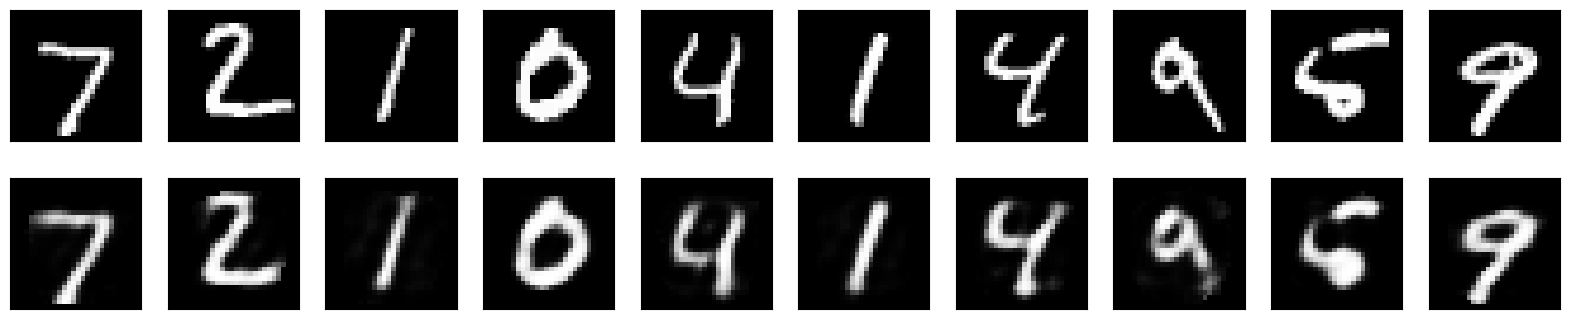

In [43]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


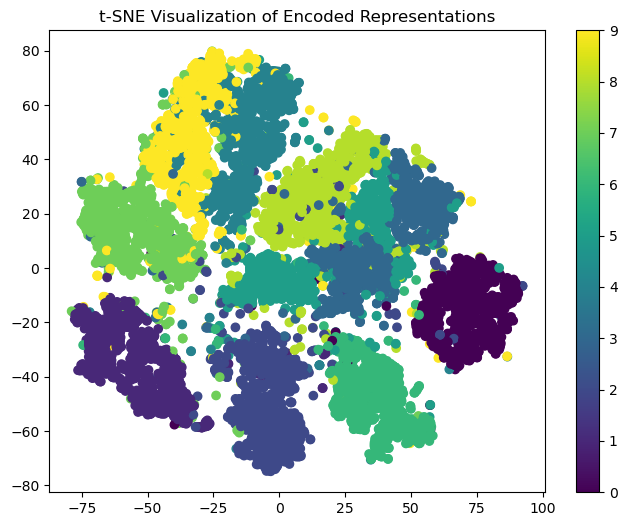

In [22]:
# Plot a t-SNE visualization of the encoded representations
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(encoded_imgs)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_test, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Encoded Representations')
plt.show()

This plot shows the 2D representation of the input data learned by the autoencoder. The plot shows that the autoencoder has learned to capture the underlying structure of the data and has separated the different classes of digits into distinct clusters.

Let's now try adding noise to the input data and see how well the autoencoder can reconstruct the noisy data.

In [23]:
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

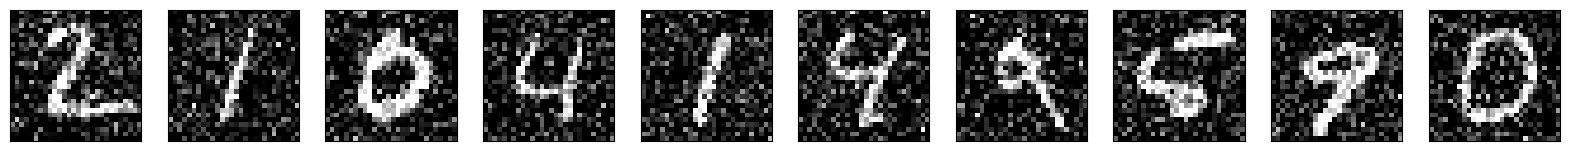

In [24]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [25]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step


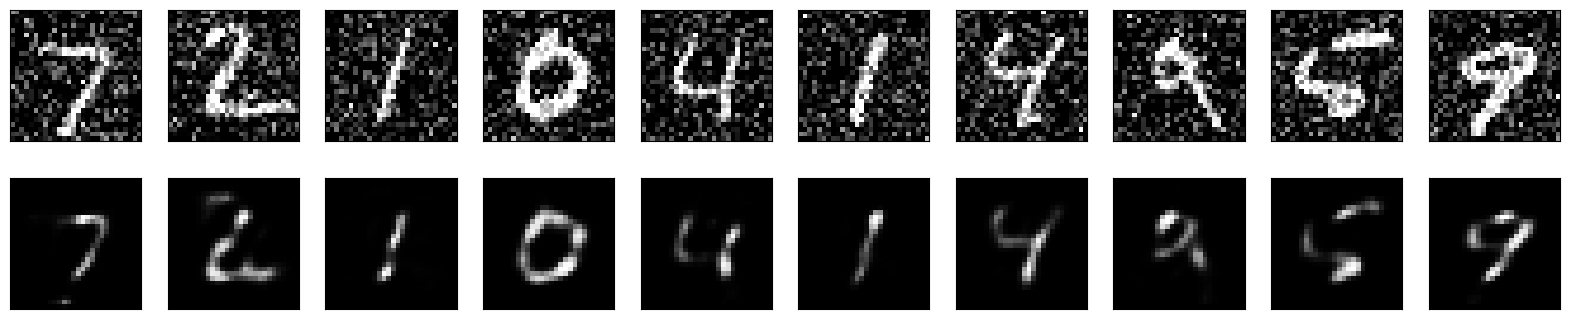

In [26]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Autoencoder summary

As you can see, the autoencoder is able to reconstruct the noisy data and remove the noise from the input data. This demonstrates the denoising capability of autoencoders and shows that they can be used to learn a low-dimensional representation of the input data that captures the underlying structure of the data - without the noise.

Using a convolutional autoencode would be more appropriate for image data and provide better results, but it takes longer to train.

There's a nice example of a CNN autoencoder here: https://blog.keras.io/building-autoencoders-in-keras.html

## Summary

In this lecture, we discussed dimensionality reduction techniques, including Principal Component Analysis (PCA), t-Distributed Stochastic Neighbor Embedding (t-SNE), and Autoencoders.



PCA is a linear technique for reducing the dimensionality of a dataset by transforming the original features into a new set of orthogonal features called principal components.



t-SNE is a non-linear technique for reducing the dimensionality of a dataset by modeling the high-dimensional data as a set of pairwise similarities and finding a low-dimensional representation of the data that preserves these similarities.



Autoencoders are a type of artificial neural network that is trained using unsupervised learning to learn a low-dimensional representation of the input data. Autoencoders consist of an encoder network that maps the input data to a lower-dimensional representation, and a decoder network that maps the lower-dimensional representation back to the original input data.


## Summary

Other dimensionality reduction techniques include kernel PCA, Isomap, and Locally Linear Embedding (LLE). See the scikit-learn documentation for more information: https://scikit-learn.org/stable/modules/manifold.html



Next week we will introduce the tile2vec algorithm for learning visual representations of satellite imagery using unsupervised, and contrastive, learning.